# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team ZF4**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [132]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
import plotly.express as px

# Libraries for statistical tests
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr

# Libraries for data preparation and model building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Libraries for Feature Importances
from sklearn.inspection import permutation_importance

# Libraries for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Libraries for model persistence
import pickle

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###
RANDOM_STATE = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [139]:
df = pd.read_csv('utils/data/df_train.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Data Dimensions and Columns Exploration

In [16]:
# Settings to display all columns
pd.set_option('display.max_columns', None)
# View some of the data
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


We can see that the `Unnamed:0` column contains identical data to the index, so it can be removed from the dataset as part of preprocessing.

In [4]:
# Check the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

We notice that there are a few `object` data type columns, which we will have to deal with in order to utilise them in the model. They are `time`, `Valencia_wind_deg`, and `Seville_pressure`.

In addition to this, we notice that `Valencia_pressure` has null values.

We will deal with these issues as part of data cleaning before analysing the data statistics in order to get accurate results during the analysis stage.

### Data Cleaning

Data cleaning is an essential part of a Data Science project. In order to replicate this part of the cleaning process of the training data in the test data, we will create functions to form part of a bigger data preprocessing function.

#### Dealing with null values

We will start by checking the percentage of nulls contained in `Valencia_pressure`.

In [5]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [6]:
print('Valencia_pressure percentage of null values is:', str(round((2068 / df.shape[0]) * 100, 2)) + '%')

Valencia_pressure percentage of null values is: 23.6%


We find that `Valencia_pressure` has 2068 null values. The percentage of null values is 23.6%. For the purposes of data exploration we do not want to drop this feature, and will instead impute either the median, mean, or mode.

In [7]:
print('Valencia_pressure mean:', df.Valencia_pressure.mean())
print('Valencia_pressure median:', df.Valencia_pressure.median())
print('Valencia_pressure mode: ', df.Valencia_pressure.mode())

Valencia_pressure mean: 1012.0514065222828
Valencia_pressure median: 1015.0
Valencia_pressure mode:  0    1018.0
dtype: float64


We find the the mean, median, and mode are quite close to each other, so it would be possible to impute any of these values without it affecting the analysis too much.

#### Imputing the median to `Valencia_pressure`

Before imputing the values, we will first make a copy of our data so that we can keep the original state of our data while we undertake the process of cleaning the data.

In [140]:
df_clean = df.copy()

In [23]:
def impute_valencia_pressure_median(df):
    '''
    Function to impute the mode to the null values of the Valencia_pressure feature.
    
    Parameters:
        df (DataFrame): A Pandas DataFrame containing the data to be cleaned.
    
    Returns:
        df(DataFrame): The same DataFrame object with Valencia_pressure imputed with the mode.
    '''
    
    # impute the null values with the mode
    df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].median())
    
    return df

In [141]:
df_clean = impute_valencia_pressure_median(df_clean)

### Converting object data types to numeric data

We now consider dealing with the `time`, `Valencia_wind_deg`, and `Seville_pressure` features. We first get a view of the format of the data before considering how best to convert these into numeric data.

#### Dealing with `time`

In [11]:
df_clean.time.head(3)

0    2015-01-01 03:00:00
1    2015-01-01 06:00:00
2    2015-01-01 09:00:00
Name: time, dtype: object

We notice that the `time` data is in a `datetime` format, though stored as an `object` type. We want to convert this to the `datetime` data type in order to do some feature engineering. This process will be handled when we perform feature engineering later.

#### Dealing with `Valencia_wind_deg`

We first inspect the data format of this feature before deciding how best to transform this data to a numeric data type. We have already seen a sample of the first five entries of the data, which appeared to be in a consistent format: level_number where number is an integer value. We will first inspect the variety of unique values in this column before deciding how best to transform these values.

In [12]:
df_clean.Valencia_wind_deg.unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

We see that the format of the values remain constant and contains integers in the range 1-10. This can be used to obtain a numerical categorical feature.

In [25]:
def convert_valencia_wind_deg(df):
    '''
    Function to convert the Valencia_wind_deg feature to a numerical data type.
    
    Parameters:
        df (DataFrame): A Pandas DataFrame containing the feature to be converted.
        
    Returns:
        df (DataFrame): A Pandas DataFrame with the Valencia_wind_deg feature converted to a numeric data type.
    '''
    
    # extract the numerical part of the string
    df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')
    # convert the numerical string to numeric data type
    df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])
    
    return df

In [142]:
df_clean = convert_valencia_wind_deg(df_clean)

#### Dealing with `Seville_pressure`

We first inspect the data format of this feature before deciding how best to transform this data to a numeric data type. We have already seen a sample of the first five entries of the data, which appeared to be in a consistent format: `'spNumber'`, where Number is an integer value. We will first inspect the variety of unique values in this column before deciding how best to transform these values.

In [15]:
df_clean.Seville_pressure.unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

We notice that the values range from sp1 to sp25 and all contain integers after sp. We can use this to extract the numerical part of the value and convert it to numeric data type.

In [27]:
def convert_seville_pressure(df):
    '''
    Function to convert the Seville_pressure feature to a numerical data type.
    
    Parameters:
        df (DataFrame): A Pandas DataFrame containing the feature to be converted.
        
    Returns:
        df (DataFrame): A Pandas DataFrame with the Seville_pressure feature converted to a numeric data type.
    '''
    
    # extract the numerical part of the string
    df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')
    # convert the numerical string to numeric data type
    df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])
    
    return df

In [143]:
df_clean = convert_seville_pressure(df_clean)

### Removing noise: `Unnamed: 0`

As mentioned before, this column contains exact values contained in the index, and since these are 100% unique values, they do not add any exlanatory power and therefore it is best to remove it from the dataset. We will create a function to do this so that this preprecessing step can be replicated for the test data.

In [29]:
def remove_unnamed(df):
    '''
    Function to remove the Unnamed: 0 column from the dataset.
    
    Parameters:
        df (DataFrame): The Pandas DataFrame containing the column Unnamed: 0.
        
    Returns:
        df (DataFrame): A Pandas DataFrame without the Unnamed: 0 column.
    '''
    
    df = df.drop(['Unnamed: 0'], axis=1)
    return df

In [144]:
df_clean = remove_unnamed(df_clean)

### Inspect Cleaned Dataset

In [20]:
df_clean.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1015.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


It seems the data cleaning process has worked. We have yet to work with our time feature, but for now we will move on to explore some data anomalies.

### Data Anomolies: Dealing with Outliers

Outliers in data can occur for a number of reasons. These include either incorrect capturing or recording, or it could be an observation that, while recorded and captured correctly, lies beyond a threshold of the other values in that data.

Exploring the kurtosis again will remind us of having to deal with any remaining issues regarding the presence of extreme outliers. Outliers can skew statistical measures and data distributions, providing a misleading representation of the underlying data and relationships. Removing outliers from the training data prior to modelling can result in a better fit of the data and therefore allow the model to make better predictions.

There are a number of approaches to dealing with outliers. There are automatic anomoly detection algorithms in scikit-learn. These include the Isolation Forest implemented in the `IsolationForest` class, the Minimum Covariance Determinant (MCD) implemented in the `EllipticEnvelope` class, the Local Outlier Factor (LOF) implemented in the `LocalOutlierFactor` class, and the One-Class SVM implemented in the `OneClassSVM` class.

They are fit on the training data and then predict which examples in the training data are outliers. Outliers will then be removed from the training set, and the model will be fit on the remaining examples. Sometimes it may on be desireable to completely remove outliers in the data as this introduces bias into the results. An alternative which introduces less bias that completely removing outlying data is Winsorization.

Winsorization is a way to minimise the influence of outliers in the data either by assigning the outlier a lower weight, or changing the value so that it is close to other values in the data. In essence, the outliers are **modified** rather than trimmed or removed.

The approach we will follow is to manually impute values for features which have obvious outliers than are not realistic. 

Our method for dealing with outliers is to inspect the different features and establish common-sense ranges for those features, outside of which will be outliers that should be removed or cleaned. We could have used an automated method such as one based on the Interquartile Range (IQR). The common-sense approach is sensible as a first step, since some weather-related features may seem like anomalies in an automated method when in reality they are expected.

In order to determine the features to inspect for outliers, we will use the kurtosis to inform us.

#### Kurtosis

Kurtosis is the measure of outliers present in the data. In other words, kurtosis is the measure of how heavy its tails are compared to a normal distribution. **High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers.

In [13]:
df_clean.drop('time', axis=1).kurtosis().sort_values(ascending=False)

Valencia_snow_3h        4089.323165
Barcelona_pressure      3687.564230
Bilbao_snow_3h           806.128471
Seville_rain_3h          413.136592
Barcelona_rain_3h        187.800460
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Madrid_rain_1h            76.584491
Valencia_wind_speed       35.645426
Bilbao_rain_1h            32.904656
Seville_weather_id        10.710308
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Valencia_pressure          4.188187
Bilbao_wind_speed          3.631565
Madrid_pressure            2.216199
Seville_clouds_all         2.155921
Madrid_wind_speed          2.036462
Bilbao_pressure            1.825323
Barcelona_wind_speed       1.493635
Seville_wind_speed         1.398580
Bilbao_temp_max            0.283366
Madrid_clouds_all          0.142079
Bilbao_weather_id          0.067814
Bilbao_temp               -0.086363
load_shortfall_3h         -0.118999
Bilbao_temp_min           -0.230342
Barcelona_temp_min        -0

Below are features with large numbers of outliers as shown by **kurtosis > 3**;

|   Feature  |       Kurtosis      |
|:-------------------|:---------------:|
| Valencia_snow_3h |4089.32 |
| Barcelona_pressure | 3687.56 | 
| Bilbao_snow_3h | 806.13 | 
| Seville_rain_3h | 413.14 | 
| Barcelona_rain_3h | 187.8 |
| Barcelona_rain_1h | 101.58 |
| Seville_rain_1h | 93.84 |
| Madrid_rain_1h | 76.58 |
| Valencia_wind_speed | 35.65 |
| Bilbao_rain_1h | 32.9 |
| Seville_weather_id | 10.71 |
| Madrid_weather_id | 9.26 |
| Barcelona_weather_id | 5.7 |
| Valencia_pressure | 4.19 |
| Bilbao_wind_speed | 3.63 |

Based on these results, it is important to manually inspect these features and determine an appropriate way to deal with outliers in a way that is sensitive to the nature of the specific feature. We will first do an inspection of the maximum and minimum values in order to determine if they are acceptable.

#### Look at Data Statistics for High Kurtosis Features

These statistics include the maximum and minimum for the features we specify, which will be the features with a kurtosis > 3.

In [17]:
features = ['Valencia_snow_3h','Barcelona_pressure', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h',
            'Barcelona_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h', 'Valencia_wind_speed', 'Bilbao_rain_1h',
            'Seville_weather_id', 'Madrid_weather_id', 'Barcelona_weather_id', 'Valencia_pressure', 'Bilbao_wind_speed']
df_clean[features].describe()

,Valencia_snow_3h,Barcelona_pressure,Bilbao_snow_3h,Seville_rain_3h,Barcelona_rain_3h,Barcelona_rain_1h,Seville_rain_1h,Madrid_rain_1h,Valencia_wind_speed,Bilbao_rain_1h,Seville_weather_id,Madrid_weather_id,Barcelona_weather_id,Valencia_pressure,Bilbao_wind_speed
count,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,0.000205,1.377965e+03,0.031912,0.000243,0.000439,0.128906,0.039439,0.037818,2.586272,0.135753,774.658818,773.527594,765.979687,1012.747252,1.850356
std,0.011866,1.407314e+04,0.557264,0.003660,0.003994,0.634730,0.175857,0.152639,2.411190,0.374901,71.940009,77.313315,88.142235,8.402812,1.695888
min,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,211.000000,200.666667,972.666667,0.000000
25%,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,800.000000,800.000000,800.000000,1012.666667,0.666667
50%,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,800.000000,800.000000,800.333333,1015.000000,1.000000
75%,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.666667,0.100000,800.000000,800.666667,801.000000,1017.333333,2.666667
max,0.791667,1.001411e+06,21.300000,0.093333,0.093000,12.000000,3.000000,3.000000,52.000000,3.000000,804.000000,804.000000,804.000000,1021.666667,12.666667


In [19]:
# Some obvious data anomalies
print('Barcelona_pressure max:', df_clean['Barcelona_pressure'].max())
print('Valencia_wind_speed max:', df_clean['Valencia_wind_speed'].max())

Barcelona_pressure max: 1001411.0
Valencia_wind_speed max: 52.0


When it comes to certain categories of features, we can understand why they would have a high kurtosis, indicating the presence of outliers. This is because features such as rain-related features and snow-related features are most likely going to record 0 for most days, and then a fluctuating amount for days in which rain or snow is actually recorded.

It appears that the **minimum** values of the features are acceptable. When it comes to **maximum** values, we can notice some obvious anomalies.

* The outliers observed in `Barcelona_pressure` are definitely due to some sort of error, as a pressure of 1001411.0 is too high. The maximum pressure recorded in history is 1084, and the maximum pressure for the other cities in the dataset are also below this value. We notice at the the 75% quartile, the value is 1022, which is still reasonable.
* `Valencia_wind_speed` has a maximum of 52, there is also something wrong with that value. The highest wind speed level recorded in history is 20 (Barrow Island, Australia, 10 April 1996, 253 mph). This value should also be replaced or dropped.
* The outliers in the other features can maybe be attributed to a significant change in weather conditions on the day that the data was collected and hence we could leave them.

The rationale for still dealing with outliers even if they may be a true reflection of a particular observation, the fact that they are anomalies means that including them in our modelling process may mean that the model learns relationships that includes noise rather than finding the true underlying relationships. In order to enhance the predictive power of our model, we rather choose to remove outliers so that our model can learn the underlying distribution better. We will impute values to the outliers in `Barcelona_pressure` and `Valencia_wind_speed` using a cutoff of 1084 and 20 respectively.

#### Manual Outlier Imputation

We will use the median value of each feature to replace any outliers.

In [145]:
# create a copy of the data before imputing outliers
df_clean_copy = df_clean.copy()

In [146]:
# impute values to outliers
df_clean['Barcelona_pressure'].values[df_clean['Barcelona_pressure'] > 1084.0] = df_clean['Barcelona_pressure'].median()
df_clean['Valencia_wind_speed'].values[df_clean['Valencia_wind_speed'] > 20.0] = df_clean['Valencia_wind_speed'].median()

In [25]:
df_clean[['Barcelona_pressure', 'Valencia_wind_speed']].describe()

,Barcelona_pressure,Valencia_wind_speed
count,8763.000000,8763.000000
mean,1017.870117,2.560139
std,9.229795,2.240768
min,670.666667,0.000000
25%,1014.000000,1.000000
50%,1018.000000,1.666667
75%,1022.000000,3.666667
max,1039.000000,20.000000


In [26]:
df_clean[features].describe()

,Valencia_snow_3h,Barcelona_pressure,Bilbao_snow_3h,Seville_rain_3h,Barcelona_rain_3h,Barcelona_rain_1h,Seville_rain_1h,Madrid_rain_1h,Valencia_wind_speed,Bilbao_rain_1h,Seville_weather_id,Madrid_weather_id,Barcelona_weather_id,Valencia_pressure,Bilbao_wind_speed
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,0.000205,1017.870117,0.031912,0.000243,0.000439,0.128906,0.039439,0.037818,2.560139,0.135753,774.658818,773.527594,765.979687,1012.747252,1.850356
std,0.011866,9.229795,0.557264,0.003660,0.003994,0.634730,0.175857,0.152639,2.240768,0.374901,71.940009,77.313315,88.142235,8.402812,1.695888
min,0.000000,670.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,211.000000,200.666667,972.666667,0.000000
25%,0.000000,1014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,800.000000,800.000000,800.000000,1012.666667,0.666667
50%,0.000000,1018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,800.000000,800.000000,800.333333,1015.000000,1.000000
75%,0.000000,1022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.666667,0.100000,800.000000,800.666667,801.000000,1017.333333,2.666667
max,0.791667,1039.000000,21.300000,0.093333,0.093000,12.000000,3.000000,3.000000,20.000000,3.000000,804.000000,804.000000,804.000000,1021.666667,12.666667


In [27]:
df_clean[['Barcelona_pressure', 'Valencia_wind_speed']].kurtosis()

Barcelona_pressure     460.920549
Valencia_wind_speed      5.239919
dtype: float64

While there remains a high kurtosis for `Barcelona_pressure` and `Valencia_wind_speed`, we have significantly reduced their respective kurtosis by dealing with the presence of outliers. Some of the remaining outliers may be naturally occuring phenomena.

### Data Statistics

In [21]:
df_clean.describe()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,5.276389,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,13.507246,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.747252,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,2.877642,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,7.237267,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,8.402812,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,3.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,7.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1012.666667,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,5.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,14.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,8.000000,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,20.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.0000

We can see some of the statistics that describe the distribution of each feature in our dataset. These statistics can be visualised by means of Box-and-Whisker plots or Violin plots.

Additional statistical measures that can be calculated are the **skew**. 

The skew is important as it will indicate how symmetrical your data is. Below is a table that explains the range of values with regards to skew.


|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

Measuring the symmetry of the data is important, because the ideal situation would be for our data to be normally distributed.

In [28]:
df_clean.drop('time', axis=1).skew().sort_values(ascending=False)

Valencia_snow_3h        63.298084
Bilbao_snow_3h          26.177568
Seville_rain_3h         19.342574
Barcelona_rain_3h       12.696605
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Madrid_rain_1h           7.074308
Bilbao_rain_1h           5.222802
Valencia_wind_speed      1.900392
Seville_clouds_all       1.814452
Bilbao_wind_speed        1.716914
Madrid_wind_speed        1.441144
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_wind_speed     1.057331
Bilbao_temp_max          0.393932
Madrid_temp              0.304123
Madrid_temp_max          0.298707
Bilbao_temp              0.293686
Barcelona_temp_max       0.276925
Madrid_temp_min          0.275083
Seville_temp_min         0.265482
Bilbao_wind_deg          0.226927
Bilbao_temp_min          0.194912
Seville_temp             0.157238
Barcelona_temp           0.128095
Valencia_wind_deg        0.088354
Valencia_temp_max        0.082672
Valencia_temp_min        0.081832
Valencia_temp 

Having inspected the symmetry, we notice there are 16 features which are highly positively skewed and 6 features which are highly negatively skewed. We have 24 features which are fairly symmetrical (15 positively and 9 negatively). We also have 1 feature that can be considered moderately negatively skewed.

We can find a relationship between the features that have a high kurtosis (large outliers) and a high skew. This means that if we can adequetly deal with the outliers, then we have a chance of having our features being more symmetric.

### Feature distributions

In order to gain an insight to the feature distributions, we will inspect one feature from each category of skewness. We will use a histogram and density plot for this purpose. We also want to inspect our **target variable** in order to better understand its underlying distribution. We will also use box-and-whisker plots and violin plots to understand more about these features.

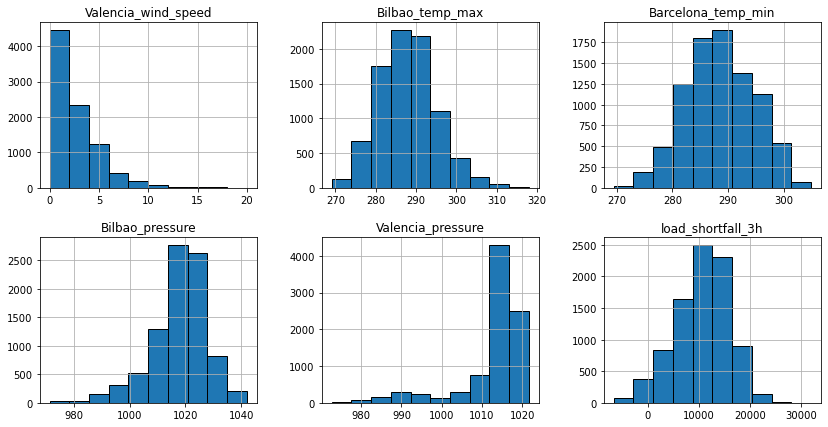

In [30]:
# features to plot histogram and density plots
features = ['Valencia_wind_speed', 'Bilbao_temp_max', 'Barcelona_temp_min', 'Bilbao_pressure',
            'Valencia_pressure', 'load_shortfall_3h']
df_clean[features].hist(figsize=(14, 7), layout=(2, 3), ec='k');
plt.savefig('assets/imgs/histogram.png')

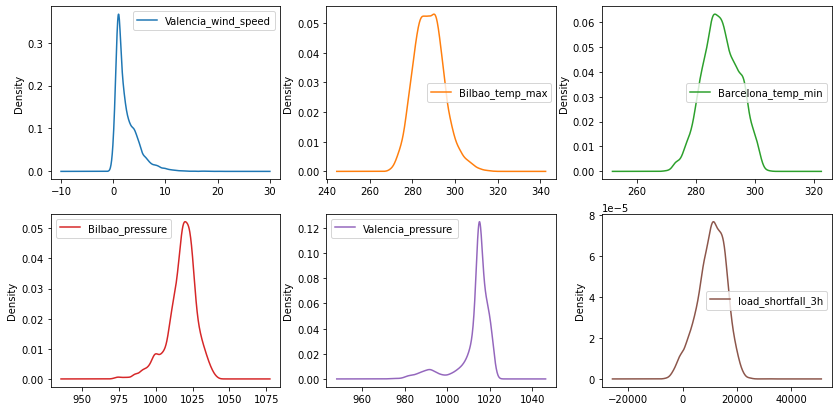

In [31]:
# density plot using same features of the histogram
df_clean[features].plot(kind='density', subplots=True, layout=(2, 3), sharex=False, figsize=(14, 7));
plt.savefig('assets/imgs/density-plot.png')

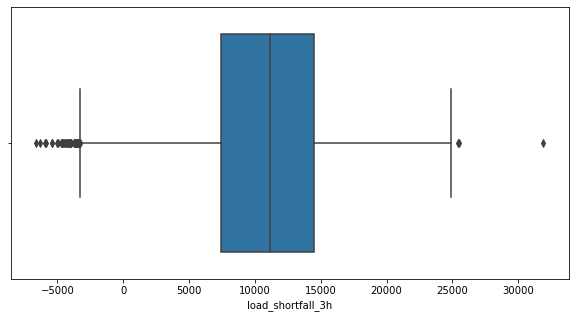

In [26]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='load_shortfall_3h', data=df_clean);
plt.savefig('assets/imgs/boxplot.png')

We see that our target has some outliers at both extremes, but most of the outliers are at the lower extreme, and only 2 outliers occur at the upper extreme.

We will do more visualisation of our target in the Feature Engineering section after we have extracted date and time features. We will then use this to plot `load_shortfall_3h` as a function of date/time.

### Evaluating Correlation: Linearity and Multicollinearity

In this section we will get a correlation matrix and also look at a heatmap to get an idea of the correlations between the features.

It is neccesary to evaluate the correlation between the features. If multiple features show strong correlation, some of these features will have to be removed from the dataset before it is used for model creation as these features are redundant and may not add any additional functionality or advantage to the model, but will lead to slower performance due to the density of the data and also impact the performance of the model.

We also want to determine the extent to which features are correlated to the target, as this will determine which features are more strongly related to the target. Also, in the case of multicollinearity between features, we will drop the ones which are less strongly correlated to the target.

A correlation value of 1 represents a perfect positive correlation while a value equal to -1 indicates a perfect negative correlation. The closer the correlation is to 0, the weaker the correlation (whether positive or negative).

In [32]:
corrs = df_clean.corr()
corrs

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.121835,0.259719,0.519792,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,-0.182792,0.108413,0.071183,-0.350052,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.172940,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Valencia_wind_deg,0.121835,1.000000,0.199288,0.301908,0.240007,0.253549,0.158266,0.075864,0.085519,0.157252,0.042795,0.151146,0.105080,-0.007258,0.000699,0.274340,-0.019783,0.069929,-0.150428,-0.019602,-0.017304,0.016777,0.020481,-0.003746,-0.018537,-0.099051,0.000478,-0.161462,-0.328244,-0.189989,-0.245685,-0.252334,-0.209860,-0.342016,-0.192267,-0.255626,-0.260643,-0.341696,-0.260622,-0.265992,-0.283031,-0.240981,-0.292904,-0.311775,-0.337965,-0.316603,-0.188674
Bilbao_rain_1h,0.259719,0.199288,1.000000,0.237274,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.067471,0.092984,0.096730,-0.222439,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.214591,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.519792,0.301908,0.237274,1.000000,-0.090793,-0.030000,0.214563,0.393622,0.144290,0.255851,0.367544,-0.062359,0.214301,0.313738,0.023396,-0.069853,0.047214,0.124557,-0.310397,0.030512,0.096452,-0.039126,0.063290,-0.096204,-0.041486,-0.080483,-0.066659,-0.046232,-0.019562,-0.143374,0.072055,0.077960,-0.200859,-0.003676,-0.440544,0.080148,-0.037605,-0.018748,-0.017963,-0.007793,-0.019521,0.004521,-0.029316,0.008152,-0.008438,-0.017343,-0.139729
Seville_humidity,-0.117892,0.240007,0.069878,-0.090793,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.217941,0.227476,0.023556,-0.007667,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.064732,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.253549,0.106765,-0.030000,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.294543,0.195455,0.031653,0.058173,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.118715,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.158266,0.370733,0.214563,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,-0.038859,0.041090,0.080180,-0.280690,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.098031,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-

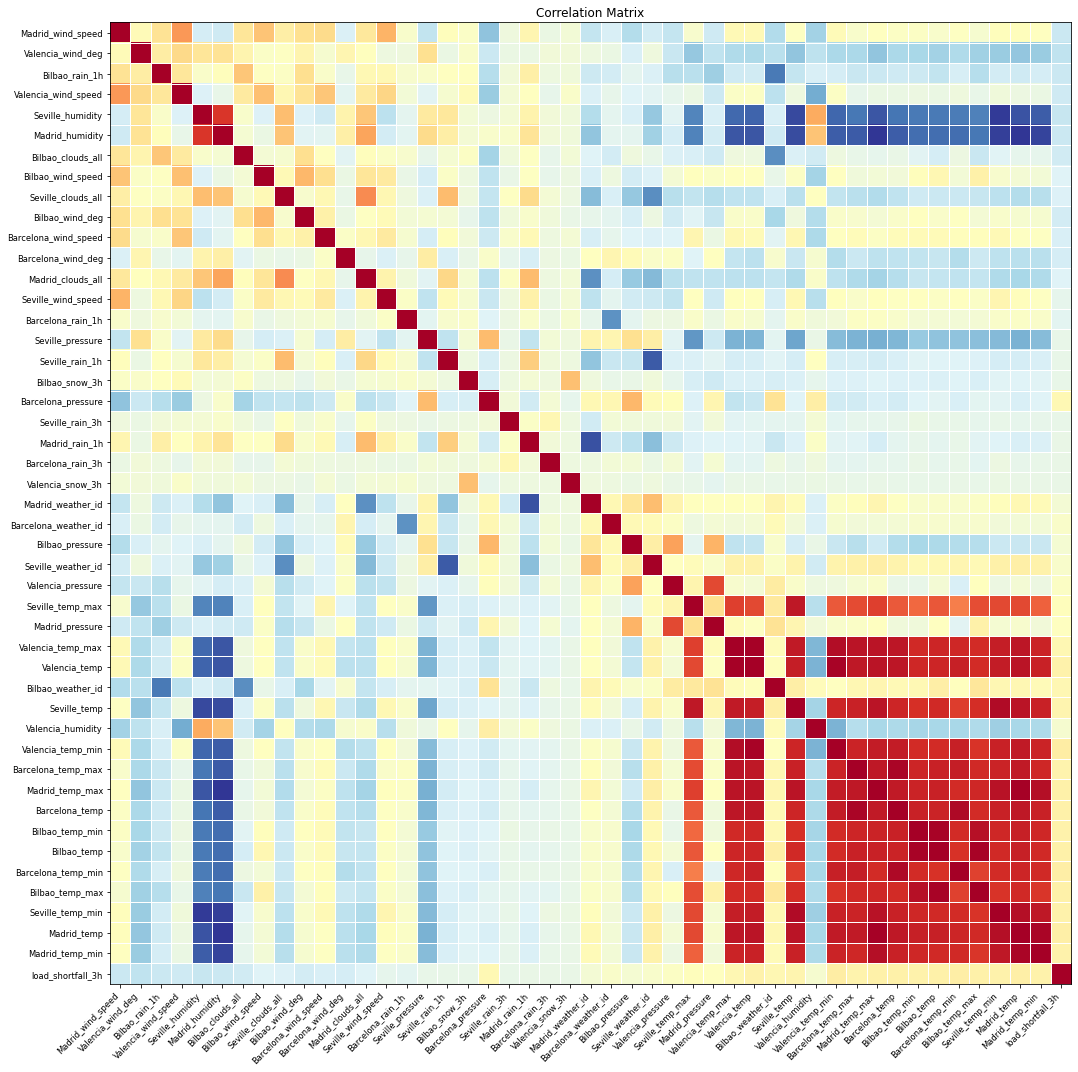

In [34]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(corrs, xnames=corrs.columns, ax=ax);
plt.savefig('assets/imgs/Correlation-Matrix.png')

Based on the information above, we can inspect that the features are not strongly correlated to the target. This means there is a low linearity between the features and the target. Also, there are some features with strong multicolinearity, as indicated in the heatmap with darker reds (positive correlation) and darker blues (negative correlation). This will be investigated further.

In [35]:
# getting to absolute correlations >= 0.5
top_corrs = corrs[abs(corrs) >= 0.5]

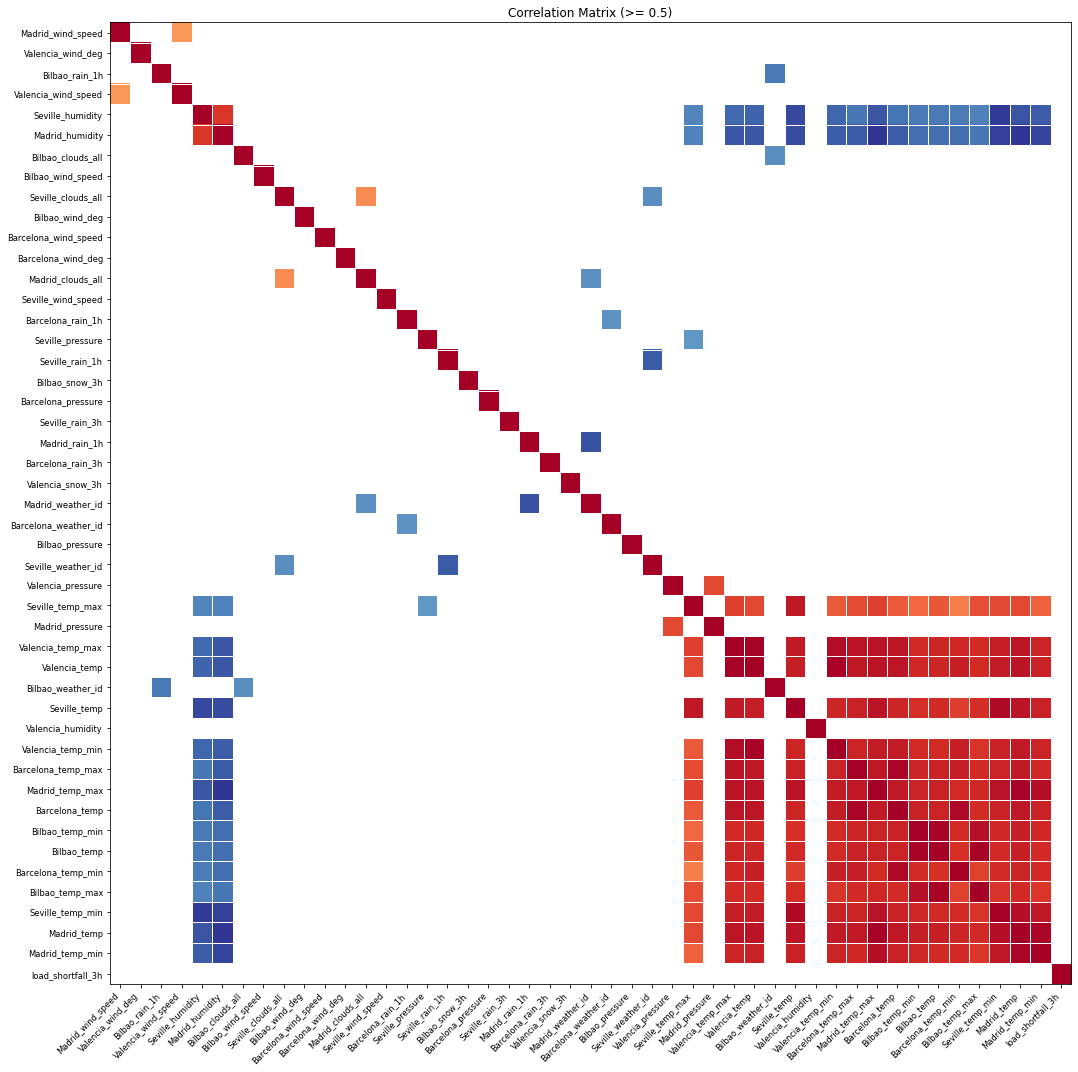

In [36]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(top_corrs, xnames=corrs.columns, title='Correlation Matrix (>= 0.5)', ax=ax);
plt.savefig('assets/imgs/Correlation-Matrix-0.5.png')

This filtered visual allows us to get a better picture of the multicollinearity between the features. We can inspect this further by displaying the values of the top correlations in a tabular form.

In [37]:
top_corrs

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,NaN,NaN,0.519792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia_wind_deg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_rain_1h,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.604616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia_wind_speed,0.519792,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_humidity,NaN,NaN,NaN,NaN,1.000000,0.799831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.566426,NaN,-0.650643,-0.663276,NaN,-0.743126,NaN,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,NaN
Madrid_humidity,NaN,NaN,NaN,NaN,0.799831,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.576413,NaN,-0.705918,-0.706989,NaN,-0.738819,NaN,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,NaN
Bilbao_clouds_all,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.536205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_wind_speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_clouds_all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.552414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.537924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_wind_deg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the data obtained from the correlation matrix above, we find that the current features are not strongly correlated (positive and negative) to the target. This affects the question of **Linearity** between the features and the target. This impacts the choice of a model, because if the relationships are not linear, then a linear regression model will not be suited to this dataset. Furthermore, we inspect the correlation between the features and notice that some features are strongly correlated with each other. This affects the question of **Multicollinearity** between features. We should avoid this and seek to drop the feature that has lower correlation to the target.

#### Exploring the Correlation Pairs

We can use the data in the correlation matrix above to inspect features with strong redundancy. We should decide on a treshold before dropping any features based on this, and this also has to consider which of the redundant features are more strongly correlated to the target. **Note: The correlations are absolute values**.

In [38]:
# sort correlations in descending order without redundant pairs
desc_corrs = corrs.abs()
# create tuples of variable pairs and their correlation values
# The matrix is symmetric. We extract upper triangle without diagonal (k=1)
sorted_corrs = (desc_corrs.where(np.triu(np.ones(desc_corrs.shape), k=1).astype(bool)).stack().sort_values(ascending=False))

#### Exploring Linearity of Features with the Target

In order to examine the correlations between features and the target, we will extract the correlation pairs that contain the `load_shortfall_3h` target and display these in descending order. This will give us an idea of which features are more strongly correlated to the target. **Note: The correlations are absolute values**.

In [39]:
for index, value in sorted_corrs.items():
    if index[1] == 'load_shortfall_3h':
        print(index, round(value, 5))

('Valencia_temp_min', 'load_shortfall_3h') 0.20186
('Barcelona_temp_min', 'load_shortfall_3h') 0.19598
('Valencia_wind_deg', 'load_shortfall_3h') 0.18867
('Madrid_temp', 'load_shortfall_3h') 0.18604
('Barcelona_temp', 'load_shortfall_3h') 0.18267
('Madrid_temp_max', 'load_shortfall_3h') 0.18255
('Bilbao_temp_max', 'load_shortfall_3h') 0.18093
('Bilbao_temp', 'load_shortfall_3h') 0.17641
('Madrid_temp_min', 'load_shortfall_3h') 0.17474
('Seville_temp_min', 'load_shortfall_3h') 0.17472
('Valencia_temp', 'load_shortfall_3h') 0.17323
('Bilbao_temp_min', 'load_shortfall_3h') 0.17292
('Seville_humidity', 'load_shortfall_3h') 0.16729
('Barcelona_temp_max', 'load_shortfall_3h') 0.16473
('Seville_temp', 'load_shortfall_3h') 0.15934
('Bilbao_rain_1h', 'load_shortfall_3h') 0.15251
('Madrid_wind_speed', 'load_shortfall_3h') 0.15098
('Madrid_humidity', 'load_shortfall_3h') 0.15054
('Bilbao_weather_id', 'load_shortfall_3h') 0.14587
('Valencia_temp_max', 'load_shortfall_3h') 0.14427
('Valencia_wind_s

We notice that the categories of features most strongly correlated to the target are **temperature features**. However, we need to explore the levels of multicollinearity between these temperature features as well, as this was observed in the correlation matrix.

#### Exploring Multicollinearity between Features

The heatmap revealed strong negative correlation between features. We will explore multicolinearity between features by displaying correlation pairs excluding the target. These will be sorted in descending order. **Note: Correlations are absolute values**. 

In [40]:
for index, value in sorted_corrs.items():
    if index[1] != 'load_shortfall_3h':
        print(index, round(value, 5))

('Madrid_temp_max', 'Madrid_temp') 0.98887
('Valencia_temp_max', 'Valencia_temp') 0.98753
('Valencia_temp', 'Valencia_temp_min') 0.98548
('Bilbao_temp_min', 'Bilbao_temp') 0.98294
('Bilbao_temp', 'Bilbao_temp_max') 0.98162
('Barcelona_temp_max', 'Barcelona_temp') 0.97448
('Madrid_temp', 'Madrid_temp_min') 0.97364
('Barcelona_temp', 'Barcelona_temp_min') 0.96409
('Seville_temp', 'Seville_temp_min') 0.95516
('Valencia_temp_max', 'Valencia_temp_min') 0.94938
('Madrid_temp_max', 'Madrid_temp_min') 0.93915
('Seville_temp_min', 'Madrid_temp') 0.93908
('Bilbao_temp_min', 'Bilbao_temp_max') 0.93222
('Madrid_temp_max', 'Seville_temp_min') 0.92348
('Seville_temp', 'Madrid_temp_max') 0.92091
('Valencia_temp_max', 'Barcelona_temp_max') 0.91826
('Valencia_temp_max', 'Madrid_temp_max') 0.91784
('Valencia_temp', 'Madrid_temp_max') 0.91782
('Seville_temp', 'Madrid_temp') 0.91708
('Valencia_temp', 'Madrid_temp') 0.91575
('Valencia_temp', 'Barcelona_temp') 0.9146
('Valencia_temp_max', 'Barcelona_temp') 

('Barcelona_pressure', 'Barcelona_temp_min') 0.10124
('Seville_rain_1h', 'Madrid_temp_min') 0.10119
('Barcelona_pressure', 'Madrid_temp') 0.10103
('Valencia_pressure', 'Barcelona_temp_min') 0.1002
('Seville_wind_speed', 'Madrid_temp_max') 0.10008
('Madrid_wind_speed', 'Barcelona_weather_id') 0.09958
('Seville_humidity', 'Bilbao_pressure') 0.09946
('Seville_clouds_all', 'Barcelona_weather_id') 0.09917
('Valencia_wind_deg', 'Bilbao_pressure') 0.09905
('Seville_rain_1h', 'Barcelona_temp') 0.09898
('Barcelona_wind_deg', 'Seville_wind_speed') 0.09884
('Bilbao_weather_id', 'Barcelona_temp_min') 0.09843
('Valencia_pressure', 'Bilbao_temp_max') 0.09839
('Madrid_wind_speed', 'Madrid_temp_min') 0.09814
('Bilbao_clouds_all', 'Valencia_pressure') 0.09803
('Madrid_weather_id', 'Madrid_pressure') 0.09801
('Barcelona_wind_speed', 'Valencia_temp_min') 0.09766
('Seville_clouds_all', 'Valencia_humidity') 0.09749
('Seville_wind_speed', 'Barcelona_temp_min') 0.09741
('Madrid_weather_id', 'Valencia_humidit

We have noticed that there are high levels of multicollinearity between features. This is where **feature selection** becomes important. There are a number of ways to deal with this, which we will discuss in the Feature Engineering section.

### Visualising Feature Interactions

Having explored linearity and multicolinearity in a non-graphical way, we will visualise some of the most relevant feature interactions. We will produce scatter plots of some of the features mosts strongly correlated to the target, and then also some of the features most strongly correlated with each other.

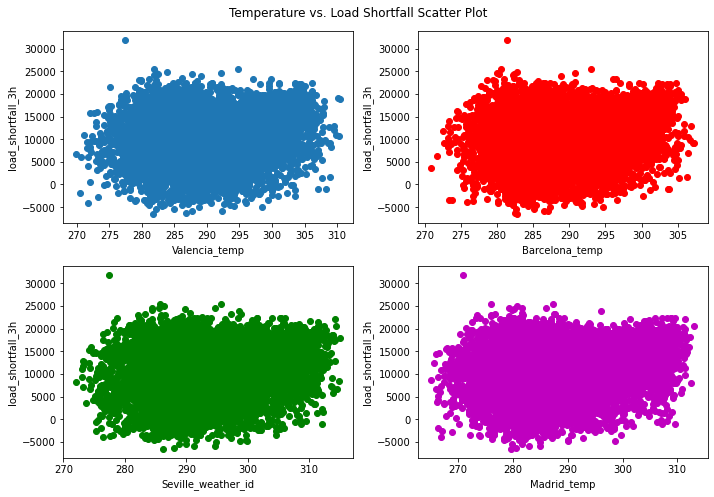

In [134]:
# scatter plots of features vs. target
fig = plt.figure(figsize=(10, 7))
plt.suptitle('Temperature vs. Load Shortfall Scatter Plot')

ax1 = plt.subplot(221)
ax2 = plt.subplot(222) 
ax3 = plt.subplot(223) 
ax4 = plt.subplot(224) 

ax1.scatter(df_clean['Valencia_temp'], df_clean['load_shortfall_3h'])
ax1.set_xlabel('Valencia_temp')
ax1.set_ylabel('load_shortfall_3h')

ax2.scatter(df_clean['Barcelona_temp'], df_clean['load_shortfall_3h'], color='r')
ax2.set_xlabel('Barcelona_temp')
ax2.set_ylabel('load_shortfall_3h')

ax3.scatter(df_clean['Seville_temp'], df_clean['load_shortfall_3h'], color ='g')
ax3.set_xlabel('Seville_weather_id')
ax3.set_ylabel('load_shortfall_3h')

ax4.scatter(df_clean['Madrid_temp'], df_clean['load_shortfall_3h'], color='m')
ax4.set_xlabel('Madrid_temp')
ax4.set_ylabel('load_shortfall_3h')

fig.tight_layout()

plt.savefig('assets/imgs/temp-target-scatter-plot.png')
plt.show()

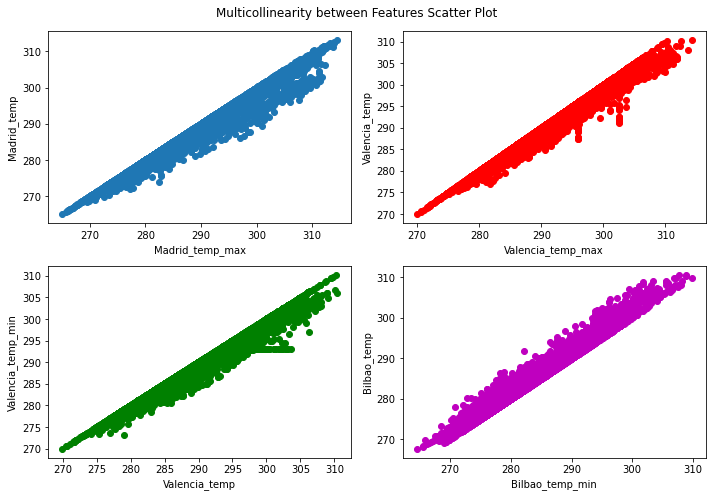

In [43]:
# Scatter plot of features with strongest multicollinearity
fig = plt.figure(figsize=(10, 7))
plt.suptitle('Multicollinearity between Features Scatter Plot')

ax1 = plt.subplot(221)
ax2 = plt.subplot(222) 
ax3 = plt.subplot(223) 
ax4 = plt.subplot(224) 

ax1.scatter(df_clean['Madrid_temp_max'], df_clean['Madrid_temp'])
ax1.set_xlabel('Madrid_temp_max')
ax1.set_ylabel('Madrid_temp')

ax2.scatter(df_clean['Valencia_temp_max'], df_clean['Valencia_temp'], color='r')
ax2.set_xlabel('Valencia_temp_max')
ax2.set_ylabel('Valencia_temp')

ax3.scatter(df_clean['Valencia_temp'], df_clean['Valencia_temp_min'], color='g')
ax3.set_xlabel('Valencia_temp')
ax3.set_ylabel('Valencia_temp_min')

ax4.scatter(df_clean['Bilbao_temp_min'], df_clean['Bilbao_temp'], color='m')
ax4.set_xlabel('Bilbao_temp_min')
ax4.set_ylabel('Bilbao_temp')

fig.tight_layout()

plt.savefig('assets/imgs/Strongest-multicollinearity-scatter-plot.png')
plt.show()

Based on just these top 4 feature pairs, we can see how strongly correlated they are to each other. This means there is a high degree of redundancy of features in the dataset and provides a good reason to drop those features which are redundant. The decision about which feature for each pair of highly correlated feature pairs to drop will be informed by their linearity to the target variable. This will be performed in the Data Engineering section.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In the **Exploratory Data Analysis (EDA)** phase, we discovered a number of issues in our data. We have problems with **Multicollinearity** and **presence of outliers** negatively affecting the quality of our dataset. In order to remedy these issues, we will be performing **feature selection** to correct these issues.

We will first be creating new features based on the current features in the dataset, namely, creating new features from the `time` feature. Thereafter we will perform some visualisations of the **target** with respect to **time**. Finally, we will perform **feature selection** in order to reduce the presence of multicollinearity and to obtain a sparse model, which in turn, reduces computation time due to the reduced dimensionality of the data.

### Create new Time-based features

We see that the `time` feature contains the `year`, `month`, `day`, and `hour`. The `minutes` and `seconds` values are both zero and can therefore be discarded. In order to make use of the `time` feature, we want to obtain numeric data types since the models we will utilise cannot use `datetime` data. For this reason, we will extract the `year`, `month`, `day`, and `hour` and create seperate columns for each of these. In addition, we will also create new features such as the `weekday` and the `week`.

The reason why we create additional features such as `weekday` and `week` are because there may be patterns that emerge in relation to the target variable in terms of which day of the week it is or which week of the year it is. This means that we may discover weekly (weekdays vs. weekends) and/or seasonal (summer vs. winter) patterns in relation to the target.

In [152]:
def get_date_time_features(df):
    '''
    Extracts the year, month, day, and hour from the time feature and creates new columns for them in the DataFrame.
    It also obtains new features (1) weekday and (2) week. These features are inserted at the front of the dataset.
    It then drops the original time feature.
    
    Parameters:
        df (DataFrame): The Pandas DataFrame containing the data to be cleaned.
        
    Returns:
        df(DataFrame): The same DataFrame with time feature dropped and new columns for year, month, day, hour, weekday, week.
    '''
    
    # convert time feature to datetime data type
    df['time'] = pd.to_datetime(df['time'])
    
    # obtain new features from the time feature and insert them at the beginning of the dataset
    df.insert(1, 'year', df['time'].dt.year)
    df.insert(2, 'month', df['time'].dt.month)
    df.insert(3, 'day', df['time'].dt.day) # day of the month
    df.insert(4, 'hour', df['time'].dt.hour)
    df.insert(5, 'week', df['time'].dt.isocalendar().week) # week of the year
    df.insert(6, 'weekday', df['time'].dt.weekday + 1) # day of the week: Monday is 1, Sunday is 7
    
    # we now drop the time column
    df = df.drop(['time'], axis=1)
    
    return df

In [156]:
df_clean = get_date_time_features(df_clean)

KeyError: 'time'

### Visualising `load_shortfall_3h` as a Function of Time

We seek to get a further understanding of our target variable with respect to time. We may uncover some relationship between the 3-hourly load shortfall and the different time-based features.

In [56]:
# Ploting time (year) against Load_shortfall_3h to see relationship
px.line(df_clean.groupby([df_clean['year']])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by year',
        y='load_shortfall_3h',width =800, height=400 )

#### Comment

We find that the yearly `load_shortfall_3h` plots indicates a drop in load shortfall from 2015 to 2016, and sharp increase in load shortfall from 2016 down to 2017. This may indicate a further upward trend for future years.

In [47]:
# Ploting time (month) against Load_shortfall_3h to see relationship
px.line(df_clean.groupby([df_clean['month']])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by month',
        y='load_shortfall_3h',width =800, height=400 )

This shows a higher load shortfall from June to December and the decreasing from January to May. This may indicate a seasonal trend.

In [57]:
# Ploting time (week) against Load_shortfall_3h to see relationship
px.line(df_clean.groupby([df_clean['week']])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by week',
        y='load_shortfall_3h',width =800, height=400 )

Although the week of the year is related to the months, we can get a better idea about the specific load shortfall fluctuations over the different weeks of the year. As was indicated in the previous graph, the weeks covering the months from June to December show a higher load shortfall than the weeks covering the months from January to May.

In [58]:
# Ploting time (day of the month) against Load_shortfall_3h to see relationship
px.line(df_clean.groupby([df_clean['day']])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by day of the month',
        y='load_shortfall_3h',width =800, height=400 )

The plot above shows 10k to 12k consistent recorded values from middle of each to the end of the month. Days 6 to 12 are recorded to be above 12k on average.

In [59]:
# Ploting time (weekday) against Load_shortfall_3h to see relationship
px.line(df_clean.groupby([df_clean['weekday']])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by weekday',
        y='load_shortfall_3h',width =800, height=400 )

The plot shows a sharp decrease in the load shortfall on Saturdays and Sundays. We can speculate that the reason for this has something to do with a lower demand for electricity during the weekends when compared to the days Monday to Friday.

In [60]:
# Ploting time (hour) against Load_shortfall_3h to see relationship
px.line(df_clean.groupby([df_clean['hour']])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by hour',
        y='load_shortfall_3h',width =800, height=400 )

This shows sharp decline in load shortfall from a local maximum at 00h00, reaching a minimum in load shortfall at 06h00 before increasing again ot 09h00 and reaching a local maximum at 12h00, then steadily decreasing until 18h00 before reaching a peak at 21h00. This shows a trend in the fluctuating demand for electricity during the course of a day and there could be reasons for these patterns.

### Feature Selection

While we did some initial cleaning of the data during the EDA phase, we identified some remaining issues to be dealt with. First, we found high kurtosis scores for many features, indicating that outliers are negatively affecting those features. Secondly, we found strong levels of multicollinearity between many pairs of features. These issues need to be dealt with in the process of selecting which features we will use to train our model.

#### Evaluating Correlations with New Time-Based Features

We want to display another correlation matrix which now includes our time-based features to inspect if there are any issues of multicollinearity between the features. We also include the target to inspect linearity between these time features and the target. This will inform a decision on which feature to drop should any strong multicollinearity be present.

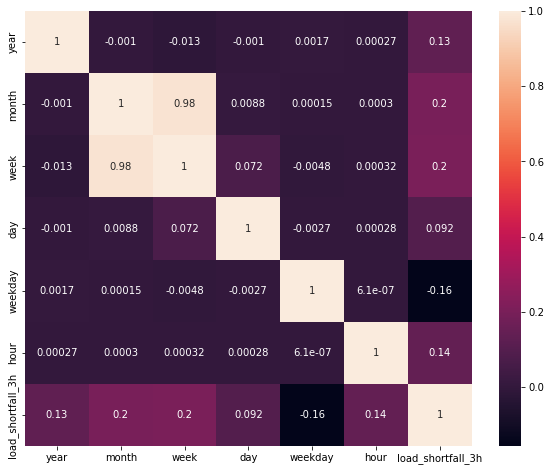

In [66]:
fig = plt.figure(figsize=(10,8));
ax = fig.add_subplot(111);
corrs = df_clean[['year', 'month', 'week', 'day', 'weekday', 'hour', 'load_shortfall_3h']].corr()
sns.heatmap(corrs, annot=True);
plt.savefig('assets/imgs/Correlation-matrix-time')

Our heatmap tells us that there is high multicollinearity between `month` and `week`. This is to be expected since the week of the year is linked to the month of the year. We would have to drop either one of the features that have high correlation with each other. By inspecting their respective correlations to the target, we find that both have an equal correlation to the target. We will therefore drop the `week` feature.

In [158]:
df_clean = df_clean.drop('week', axis=1)

#### Removing Multicollinearity: Variance Inflation Factor

Having cleaned the dataset before performing data analysis, we have to ensure that we have all the features we need in order to train the model. This is will be performed later. First, we will seek to drop features which have strong multicollinearity, as these are redundant and could impair the performance of the model. The result of this would be to achieve sparsity, which will also improve training time.

Having computed the correlation pairs and sorted them according to the highest multicollinearity, we found that there were too many pairs to consider which ones were best to drop by manual inspection and comparison to its linearity with the target. Fortunately, there is a way to automate this process of removing redundant variables.

We will achive this by using a measure known as the **Variance Inflation Factor (VIF)**. This is a **measure of the amount of multicollinearity in a set of multiple regression variables**. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

    - VIF
    - R2
    - MSE
    
So in other words, VIF how much the behaviour (variance) of an independent variable is influenced (inflated) by its interaction (correlation) with the other independent variables.

The rationale for removing features with strong multicollinearity is not primarily that those features will negatively impact the performance of the model's predictions per se, but that it will reduce our ability to determine which features were most important to the model's prediction decision.

In [159]:
# create a copy of the data since we only want to illustrate the result of this approach without using those results
df_clean_ = df_clean.copy()

In [160]:
def drop_redundant_features_vif(X, threshold=10):
    '''
    This function will drop redundant features from the dataset based on a threshold value for the variance inflation factor.
    It also prints the feature(s) that are dropped after each computation of vif. 
    
    Parameters:
        X (DataFrame): A Pandas DataFrame containing the numerical features to be dropped.
        threshold (int): A value to determine the variance inflation factor cutoff. The default threshold is 10.
        
    Returns:
        X_ (DataFrame): A Pandas DataFrame with the remaining features after the variance inflation threshold was considered.
    '''
    X_ = X.copy()
    X_ = X_.apply(pd.to_numeric) # Need floats for the variance_inflation_factor function
    cols = X_.columns
    indices = np.arange(X_.shape[1])
    count = 0
    dropped = True
    
    while dropped:
        dropped = False
        v = X_[cols[indices]].values
        vif = [variance_inflation_factor(v, ix) for ix in np.arange(v.shape[1])]
        max_vif = max(vif)
        max_loc = vif.index(max_vif) # get the index for the highest vif values computed for current set of variables
        
        if max_vif > threshold:
            print('Dropping', X_[cols[indices]].columns[max_loc], 'at index', max_loc)
            indices = np.delete(indices, max_loc)
            dropped = True
            count += 1
            
    print('Number of features dropped:', count)
    X_ = X_[cols[indices]]
    
    return X_

In [161]:
df_clean_ = drop_redundant_features_vif(df_clean_)

Dropping Bilbao_temp at index 45
Dropping Seville_temp at index 38
Dropping Valencia_temp at index 36
Dropping Barcelona_temp at index 41
Dropping Madrid_temp at index 45
Dropping year at index 0
Dropping Valencia_temp_max at index 34
Dropping Valencia_pressure at index 31
Dropping Bilbao_temp_min at index 38
Dropping Madrid_temp_max at index 37
Dropping Barcelona_temp_min at index 37
Dropping Bilbao_pressure at index 29
Dropping Seville_temp_min at index 37
Dropping Valencia_temp_min at index 34
Dropping Barcelona_temp_max at index 34
Dropping Barcelona_pressure at index 22
Dropping Bilbao_temp_max at index 33
Dropping Seville_temp_max at index 29
Dropping Madrid_pressure at index 29
Dropping Madrid_temp_min at index 31
Dropping Seville_weather_id at index 28
Dropping Madrid_weather_id at index 26
Dropping Barcelona_weather_id at index 26
Dropping Bilbao_weather_id at index 26
Dropping Seville_humidity at index 8
Dropping Madrid_humidity at index 8
Dropping Valencia_humidity at index 

In [162]:
df_clean_.shape[1]

25

We notice that 27 features have been dropped using the default threshold of 10, leaving 25 features. A higher threshold will mean that possibly less features will be dropped using this automated appraoch. Of the 27 features dropped, 15 of them were temperature features. That means all of the temperature features were dropped. For our purposes, however, we will manually deal with the problem of multicollinearity that exists in the temperature features. 

#### Feature Selection: Pearson Regression

We will explore a method of feature selection based on their p-values. We will choose a 5% significance value.

In [76]:
# Build a dictionary of correlation coefficients and p-values and put in a DataFrame
dict_pc = {}
corrs = df_clean.corr()['load_shortfall_3h']

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(df_clean[col], df_clean['load_shortfall_3h'])[1],6)
    dict_pc[col] = {'Correlation_Coefficient':corrs[col], 'P_Value':p_val}
    
df_pc = pd.DataFrame(dict_pc).T
df_pc_sorted = df_pc.sort_values('P_Value')
df_pc_sorted[df_pc_sorted['P_Value'] < 0.05] # choosing features with a 5% significance value

,Correlation_Coefficient,P_Value
year,0.131324,0.000000
Barcelona_weather_id,0.063868,0.000000
Seville_weather_id,0.061104,0.000000
Valencia_pressure,0.084220,0.000000
Seville_temp_max,0.109834,0.000000
Madrid_pressure,0.092638,0.000000
Valencia_temp_max,0.144270,0.000000
Valencia_temp,0.173225,0.000000
Bilbao_weather_id,0.145875,0.000000
Madrid_temp,0.186036,0.000000


Based on the analysis above, we should persist with the features we have currently. However, upon reflection on the remaining time-based features, we notice that we have `year`, `month`, and `day` features. Now there could be an issue when a model is seeking to establish a relationship between the day of the month and the target. But having seen the graph of the relationship between the `weekday` and the target, we see that the target is more dependent on the day of the week than on the day of the month. This is because the day of the month can fall within the range of Monday to Friday in some years and months, and then in the range of Saturday to Sunday in other years and months. This means that the day of the month feature `day` does not hold that much value. It is more valuable to keep `weekday` instead.

In [163]:
df_clean = df_clean.drop('day', axis=1)

#### Reducing Multicollinearity of Temperature-Based Features

Having noticed issues of multicollinearity in the temperature features, we will choose to drop the `temp_min` and `temp_max` features of each city and retain the `temp` feature of each city.

In [164]:
drop = ['Madrid_temp_min', 'Madrid_temp_max', 'Barcelona_temp_min', 'Barcelona_temp_max', 'Valencia_temp_min',
        'Valencia_temp_max', 'Seville_temp_min', 'Seville_temp_max', 'Bilbao_temp_min', 'Bilbao_temp_max',
       'Barcelona_rain_1h', 'Bilbao_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h', 'Bilbao_snow_3h', 'Barcelona_rain_3h',
       'Seville_rain_3h', 'Valencia_snow_3h']
df_sparse = df_clean.drop(drop, axis=1)

We now have 2 dataframes. `df_clean` contains all the temperature features while `df_sparse` contains all the features of `df_clean` except for the `{city}_temp_{min/max}` features. That means `df_sparse` has 10 less features than `df_clean`.

Having undertaking some feature engineering, we are now ready to move on to the modelling phase.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In this section, we will be creating multiple regression models. This will be done in two seperate sections. First we will create six models to serve as a baseline. We will use the results of the baseline models to perform model selection later. Second, we will create an ensemble of models and compare it with the performance of the best performing baseline model. 

### Creating the Features and Target Datasets with Standardisation
 
We first seek to create seperate datasets for the features and the target. We then want to apply standardisation to the features. We also want to create training and validation sets from the data before attempting to create some baseline models in order to compare the performance of different individual models on some unseen data. **Note**: We are creating a `X_dense` dataset seperately for possible use later when exploring the impact of the sparsity of the data on the validation scores.

In [165]:
X = df_sparse.drop('load_shortfall_3h', axis=1)
y = df_sparse['load_shortfall_3h']

X_dense = df_clean.drop('load_shortfall_3h', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_dense_scaled = scaler.fit_transform(X_dense)
X_dense_scaled = pd.DataFrame(X_dense_scaled, columns=X_dense.columns)

In [166]:
X_scaled.head()

,year,month,hour,weekday,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,...,Seville_weather_id,Valencia_pressure,Madrid_pressure,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Barcelona_temp,Bilbao_temp,Madrid_temp
0,-1.226179,-1.602429,-1.090901,-0.00274,-0.950708,-0.096053,-0.362123,-0.845059,0.516117,0.270621,...,0.352274,-1.199737,-1.756232,-2.890888,0.649842,-2.490266,0.540928,-1.354598,-2.505658,-2.405393
1,-1.226179,-1.602429,-0.654451,-0.00274,-1.130863,1.641580,-0.362123,-0.398758,0.692953,0.298017,...,0.352274,-1.001379,-1.696165,-2.633926,0.649842,-2.403108,0.298645,-1.423738,-2.353511,-2.357388
2,-1.226179,-1.602429,-0.218001,-0.00274,-0.770554,1.294054,-0.362123,-0.696292,0.383491,0.284319,...,0.352274,-0.882364,-1.636097,-1.757012,0.649842,-1.917409,0.021750,-1.267176,-1.671342,-1.680968
3,-1.226179,-1.602429,0.218449,-0.00274,-0.770554,0.946527,-0.362123,-0.696292,0.118238,-0.044439,...,0.352274,-0.445978,-0.705052,-0.794849,0.649842,-1.083879,-0.583957,-0.983703,-0.775541,-0.698057
4,-1.226179,-1.602429,0.654899,-0.00274,-0.770554,0.599000,-0.362123,-0.696292,-0.161751,-0.017043,...,0.352274,0.268110,1.127003,-1.057970,0.649842,-1.068764,-0.358980,-0.864356,-0.611717,-0.828246


In [167]:
# split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_dense_train, X_dense_val, y_dense_train, y_dense_val = train_test_split(X_dense_scaled, y, test_size=0.2, random_state=42)

### Creating Baseline Models

Since we have performed data cleaning by removing many features with high kurtosis and high multicollinearity, we want to be able to assess if these changes negatively impact the performance of the models. As such, we will use a dense training and validation set to serve as a baseline. We will then compare this to models that use the sparse training and validation sets.

In [168]:
# Initialise the models
lm = LinearRegression()
ridge = Ridge(alpha=0.01)
lasso = Lasso(alpha=0.02, max_iter=2000)
svr = SVR(kernel='rbf', gamma='auto')
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42)

### Training the Baseline Models

We will fit our baseline models on the data.

In [169]:
lm.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
svr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)

We are now ready to progress to evaluate the results of the training.

### Baseline Models Training Evaluation

We want to explore the result of training, but this is not the measure of performance to compare models. We want to have an idea of how models perform on the training data so that when we compare them to the validation data performance, we can find out if a particular model was overfitting on the training data. To evaluate the performance of models, we will use 2 key metrics: **RMSE** and **R2**.

**RMSE** (Root Mean Squared Error) is the standard deviation of the residuals (prediction errors). It is this a measure of how spread the residuals are around the line of best fit. In other words, RMSE is a measure of the error made in predicting the target. The **lower** the better.

**R2** is a measure that represents the proportion of the variance for a dependent variable that is explained by the independent variables in the regression model. It tells us how well the regression model explains the observed data. In other words, R2 is a measure of how accurately the model predicts the target. The **higher** the better.

A lower RMSE and a higher R2 is what we seek to achieve.

In [170]:
y_pred_lm = lm.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)
y_pred_svr = svr.predict(X_train)
y_pred_dt = dt.predict(X_train)
y_pred_rf = rf.predict(X_train)

In [171]:
train_results_dict = {'Training RMSE':{'Linear Regression':np.sqrt(mean_squared_error(y_train, y_pred_lm)),
                                     'Ridge Regression':np.sqrt(mean_squared_error(y_train, y_pred_ridge)),
                                     'Lasso Regression':np.sqrt(mean_squared_error(y_train, y_pred_lasso)),
                                     'Support Vector Regressor':np.sqrt(mean_squared_error(y_train, y_pred_svr)),
                                       'Decision Tree':np.sqrt(mean_squared_error(y_train, y_pred_dt)),
                                       'Random Forest':np.sqrt(mean_squared_error(y_train, y_pred_rf))
                                     },
                     'Training R2:':{'Linear Regression':r2_score(y_train, y_pred_lm),
                                    'Ridge Regression':r2_score(y_train, y_pred_ridge),
                                    'Lasso Regression':r2_score(y_train, y_pred_lasso),
                                    'Support Vector Regressor':r2_score(y_train, y_pred_svr),
                                     'Decision Tree':r2_score(y_train, y_pred_dt),
                                     'Random Forest':r2_score(y_train, y_pred_rf)
                                    }
                     }

train_results_df = pd.DataFrame(data=train_results_dict)
train_results_df

,Training RMSE,Training R2:
Linear Regression,4721.764859,0.173956
Ridge Regression,4721.764859,0.173956
Lasso Regression,4721.764863,0.173956
Support Vector Regressor,5182.951034,0.004713
Decision Tree,0.000000,1.000000
Random Forest,3352.802841,0.583504


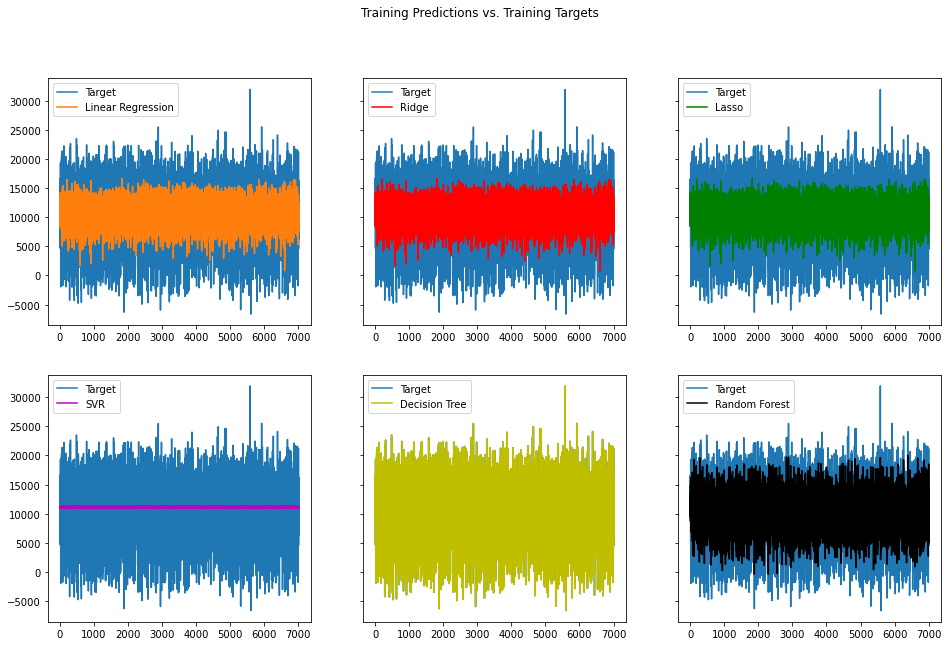

In [119]:
# plot training predictions vs. actual training target
fig, axs = plt.subplots(2, 3, figsize=(16, 10), sharey=True)
fig.suptitle('Training Predictions vs. Training Targets')

axs[0,0].plot(np.arange(len(y_train)), y_train, label='Target')
axs[0,0].plot(np.arange(len(y_train)), y_pred_lm, label='Linear Regression')
axs[0,0].legend()

axs[0,1].plot(np.arange(len(y_train)), y_train, label='Target')
axs[0,1].plot(np.arange(len(y_train)), y_pred_ridge, label='Ridge', color='r')
axs[0,1].legend()

axs[0,2].plot(np.arange(len(y_train)), y_train, label='Target')
axs[0,2].plot(np.arange(len(y_train)), y_pred_lasso, label='Lasso', color='g')
axs[0,2].legend()

axs[1,0].plot(np.arange(len(y_train)), y_train, label='Target')
axs[1,0].plot(np.arange(len(y_train)), y_pred_svr, label='SVR', color='m')
axs[1,0].legend()

axs[1,1].plot(np.arange(len(y_train)), y_train, label='Target')
axs[1,1].plot(np.arange(len(y_train)), y_pred_dt, label='Decision Tree', color='y')
axs[1,1].legend()

axs[1,2].plot(np.arange(len(y_train)), y_train, label='Target')
axs[1,2].plot(np.arange(len(y_train)), y_pred_rf, label='Random Forest', color='k')
axs[1,2].legend()

plt.savefig('assets/imgs/baseline-training-predictions.png')
plt.show()

Based on the RMSE and R2 scores, we saw that the decision tree model fit to all the target values in the training data. This is confirmed in the plot of the predictions vs. actual value for the target made by the decision tree. We did not tune any hyperparameters such as limiting the depth of the tree or the minimum number of samples per leaf node. We can suppose that the decision tree is likely to suffer from overfitting when compared to the other models. We will confirm this hypothesis when we evaluate the model performances on the validation set. 

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In this section we will do the following:
- Compare model performance
- Choose the best model and motivate why it is the best choice
- Tune the model hyperparameters
- Save the chosen model
- Use the tuned model for kaggle submissions

### Compare Baseline Model Performance

We make predictions on the validation set and then compare the MSE and R2 scores for each model.  We will combine the results of training in order to better assess the problem of overfitting.

In [172]:
# Predictions on validation set
val_pred_lm = lm.predict(X_val)
val_pred_ridge = ridge.predict(X_val)
val_pred_lasso = lasso.predict(X_val)
val_pred_svr = svr.predict(X_val)
val_pred_dt = dt.predict(X_val)
val_pred_rf = rf.predict(X_val)

In [175]:
results_dict = {'Training RMSE':{'Linear Regression':np.sqrt(mean_squared_error(y_train, y_pred_lm)),
                                     'Ridge Regression':np.sqrt(mean_squared_error(y_train, y_pred_ridge)),
                                     'Lasso Regression':np.sqrt(mean_squared_error(y_train, y_pred_lasso)),
                                     'Support Vector Regressor':np.sqrt(mean_squared_error(y_train, y_pred_svr)),
                                       'Decision Tree':np.sqrt(mean_squared_error(y_train, y_pred_dt)),
                                       'Random Forest':np.sqrt(mean_squared_error(y_train, y_pred_rf))
                                     },
                'Validation RMSE':{'Linear Regression':np.sqrt(mean_squared_error(y_val, val_pred_lm)),
                                     'Ridge Regression':np.sqrt(mean_squared_error(y_val, val_pred_ridge)),
                                     'Lasso Regression':np.sqrt(mean_squared_error(y_val, val_pred_lasso)),
                                     'Support Vector Regressor':np.sqrt(mean_squared_error(y_val, val_pred_svr)),
                                       'Decision Tree':np.sqrt(mean_squared_error(y_val, val_pred_dt)),
                                       'Random Forest':np.sqrt(mean_squared_error(y_val, val_pred_rf))
                                     },
                'Training R2':{'Linear Regression':r2_score(y_train, y_pred_lm),
                                    'Ridge Regression':r2_score(y_train, y_pred_ridge),
                                    'Lasso Regression':r2_score(y_train, y_pred_lasso),
                                    'Support Vector Regressor':r2_score(y_train, y_pred_svr),
                                     'Decision Tree':r2_score(y_train, y_pred_dt),
                                     'Random Forest':r2_score(y_train, y_pred_rf)
                                    },
                'Validation R2':{'Linear Regression':r2_score(y_val, val_pred_lm),
                                    'Ridge Regression':r2_score(y_val, val_pred_ridge),
                                    'Lasso Regression':r2_score(y_val, val_pred_lasso),
                                    'Support Vector Regressor':r2_score(y_val, val_pred_svr),
                                     'Decision Tree':r2_score(y_val, val_pred_dt),
                                     'Random Forest':r2_score(y_val, val_pred_rf)
                                    }
                     }

results_df = pd.DataFrame(data=results_dict)
results_df

,Training RMSE,Validation RMSE,Training R2,Validation R2
Linear Regression,4721.764859,4838.552312,0.173956,0.168708
Ridge Regression,4721.764859,4838.552605,0.173956,0.168708
Lasso Regression,4721.764863,4838.560339,0.173956,0.168705
Support Vector Regressor,5182.951034,5293.169126,0.004713,0.005157
Decision Tree,0.000000,5232.892801,1.000000,0.027686
Random Forest,3352.802841,3999.776696,0.583504,0.431940


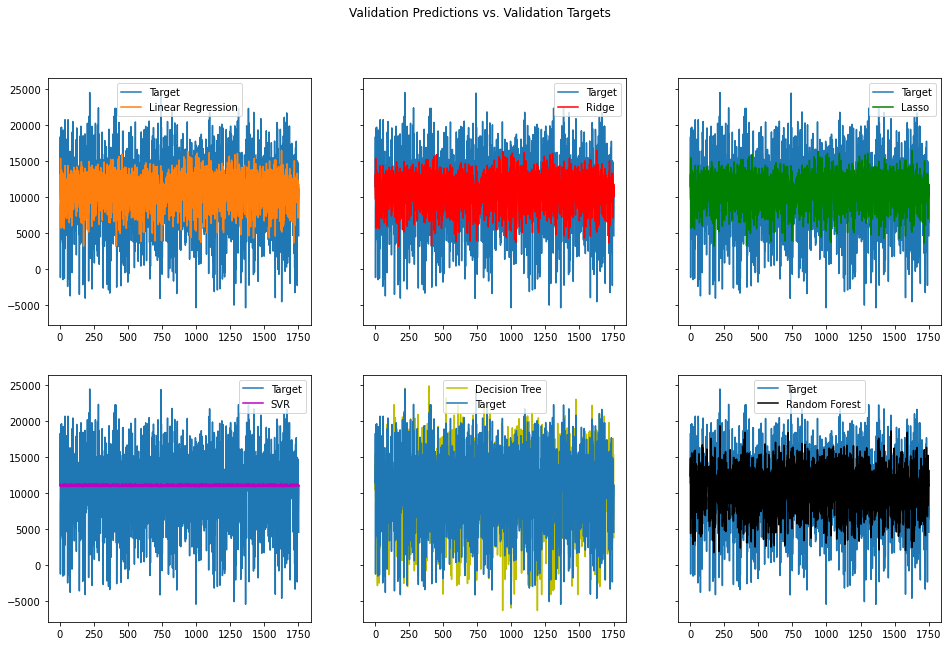

In [120]:
# plot training predictions vs. actual training target
fig, axs = plt.subplots(2, 3, figsize=(16, 10), sharey=True)
fig.suptitle('Validation Predictions vs. Validation Targets')

axs[0,0].plot(np.arange(len(y_val)), y_val, label='Target')
axs[0,0].plot(np.arange(len(y_val)), val_pred_lm, label='Linear Regression')
axs[0,0].legend()

axs[0,1].plot(np.arange(len(y_val)), y_val, label='Target')
axs[0,1].plot(np.arange(len(y_val)), val_pred_ridge, label='Ridge', color='r')
axs[0,1].legend()

axs[0,2].plot(np.arange(len(y_val)), y_val, label='Target')
axs[0,2].plot(np.arange(len(y_val)), val_pred_lasso, label='Lasso', color='g')
axs[0,2].legend()

axs[1,0].plot(np.arange(len(y_val)), y_val, label='Target')
axs[1,0].plot(np.arange(len(y_val)), val_pred_svr, label='SVR', color='m')
axs[1,0].legend()

axs[1,1].plot(np.arange(len(y_val)), val_pred_dt, label='Decision Tree', color='y')
axs[1,1].plot(np.arange(len(y_val)), y_val, label='Target')
axs[1,1].legend()

axs[1,2].plot(np.arange(len(y_val)), y_val, label='Target')
axs[1,2].plot(np.arange(len(y_val)), val_pred_rf, label='Random Forest', color='k')
axs[1,2].legend()

plt.savefig('assets/imgs/baseline-validation-predictions.png')
plt.show()

We see that the decision tree performed the worst on the validation set. This is an example of extreme overfitting was correct. 

### Model Selection

Although these are very bad MSE and R2 scores, we can still make a few comparisons between the training and validation scores.
- The Decision Tree performed best on the training set
- The Random Forest performed best on the validation set
This shows that the decision tree model overfitted the training data whereas the random forest generalised better than the other models. Based on the RMSE and R2 scores, the random forest is by far the best of the baseline models.
More work needs to be done to achive a lower MSE and higher R2 score.

**Best Model: Random Forest**

### Tuning the Random Forest

In this section, we seek to perform some basic hyperparameter tuning on the random forest model. WE will run the code and tune the following hyperparameters:
- `n_estimators`
- `max_depth`
- `min_samples_leaf`

Once these have been tuned, we will move on to finding the best `random_state` to seed the model.

```python
forest_1 = RandomForestRegressor(n_estimators=175, max_depth=22, min_samples_leaf=2, random_state=42)
forest_2 = RandomForestRegressor(n_estimators=190, max_depth=25, min_samples_leaf=2, random_state=42)
forest_3 = RandomForestRegressor(n_estimators=210, max_depth=22, min_samples_leaf=2, random_state=42)
forest_4 = RandomForestRegressor(n_estimators=210, max_depth=25, min_samples_leaf=2, random_state=42)
forest_5 = RandomForestRegressor(n_estimators=230, max_depth=22, min_samples_leaf=2, random_state=42)
forest_6 = RandomForestRegressor(n_estimators=230, max_depth=25, min_samples_leaf=2, random_state=42)
forest_7 = RandomForestRegressor(n_estimators=250, max_depth=22, min_samples_leaf=2, random_state=42)
forest_8 = RandomForestRegressor(n_estimators=250, max_depth=25, min_samples_leaf=2, random_state=42)
forest_9 = RandomForestRegressor(n_estimators=260, max_depth=22, min_samples_leaf=2, random_state=42)
forest_10 = RandomForestRegressor(n_estimators=260, max_depth=56, min_samples_leaf=2, random_state=42)

forest_1.fit(X_train, y_train)
forest_2.fit(X_train, y_train)
forest_3.fit(X_train, y_train)
forest_4.fit(X_train, y_train)
forest_5.fit(X_train, y_train)
forest_6.fit(X_train, y_train)
forest_7.fit(X_train, y_train)
forest_8.fit(X_train, y_train)
forest_9.fit(X_train, y_train)
forest_10.fit(X_train, y_train)

train_pred_1 = forest_1.predict(X_train)
train_pred_2 = forest_2.predict(X_train)
train_pred_3 = forest_3.predict(X_train)
train_pred_4 = forest_4.predict(X_train)
train_pred_5 = forest_5.predict(X_train)
train_pred_6 = forest_6.predict(X_train)
train_pred_7 = forest_7.predict(X_train)
train_pred_8 = forest_8.predict(X_train)
train_pred_9 = forest_9.predict(X_train)
train_pred_10 = forest_10.predict(X_train)

val_pred_1 = forest_1.predict(X_val)
val_pred_2 = forest_2.predict(X_val)
val_pred_3 = forest_3.predict(X_val)
val_pred_4 = forest_4.predict(X_val)
val_pred_5 = forest_5.predict(X_val)
val_pred_6 = forest_6.predict(X_val)
val_pred_7 = forest_7.predict(X_val)
val_pred_8 = forest_8.predict(X_val)
val_pred_9 = forest_9.predict(X_val)
val_pred_10 = forest_10.predict(X_val)

# results of 8forest models on training and validation
results_dict = {'Training RMSE':{'1':np.sqrt(mean_squared_error(y_train, train_pred_1)),
                                     '2':np.sqrt(mean_squared_error(y_train, train_pred_2)),
                                     '3':np.sqrt(mean_squared_error(y_train, train_pred_3)),
                                     '4':np.sqrt(mean_squared_error(y_train, train_pred_4)),
                                       '5':np.sqrt(mean_squared_error(y_train, train_pred_5)),
                                       '6':np.sqrt(mean_squared_error(y_train, train_pred_6)),
                                       '7':np.sqrt(mean_squared_error(y_train, train_pred_7)),
                                       '8':np.sqrt(mean_squared_error(y_train, train_pred_8)),
                                       '9':np.sqrt(mean_squared_error(y_train, train_pred_9)),
                                       '10':np.sqrt(mean_squared_error(y_train, train_pred_10))
                                     },
                      'Validation RMSE':{'1':np.sqrt(mean_squared_error(y_val, val_pred_1)),
                                     '2':np.sqrt(mean_squared_error(y_val, val_pred_2)),
                                     '3':np.sqrt(mean_squared_error(y_val, val_pred_3)),
                                     '4':np.sqrt(mean_squared_error(y_val, val_pred_4)),
                                       '5':np.sqrt(mean_squared_error(y_val, val_pred_5)),
                                       '6':np.sqrt(mean_squared_error(y_val, val_pred_6)),
                                       '7':np.sqrt(mean_squared_error(y_val, val_pred_7)),
                                       '8':np.sqrt(mean_squared_error(y_val, val_pred_8)),
                                        '9':np.sqrt(mean_squared_error(y_val, val_pred_9)),
                                        '10':np.sqrt(mean_squared_error(y_val, val_pred_10))
                                        },
                     'Training R2':{'1':r2_score(y_train, train_pred_1),
                                    '2':r2_score(y_train, train_pred_2),
                                    '3':r2_score(y_train, train_pred_3),
                                    '4':r2_score(y_train, train_pred_4),
                                    '5':r2_score(y_train, train_pred_5),
                                    '6':r2_score(y_train, train_pred_6),
                                    '7':r2_score(y_train, train_pred_7),
                                    '8':r2_score(y_train, train_pred_8),
                                    '9':r2_score(y_train, train_pred_9),
                                    '10':r2_score(y_train, train_pred_10)
                                    },
                      'Validation R2':{'1':r2_score(y_val, val_pred_1),
                                    '2':r2_score(y_val, val_pred_2),
                                    '3':r2_score(y_val, val_pred_3),
                                    '4':r2_score(y_val, val_pred_4),
                                    '5':r2_score(y_val, val_pred_5),
                                    '6':r2_score(y_val, val_pred_6),
                                    '7':r2_score(y_val, val_pred_7),
                                    '8':r2_score(y_val, val_pred_8),
                                    '9':r2_score(y_val, val_pred_9),
                                    '10':r2_score(y_val, val_pred_10)
                                      }
                     }

results_df = pd.DataFrame(data=results_dict)
results_df
```

In [ ]:
# finding best random_state
best_score = 10000
best_model = None
best_random_state = 0
rmse = 0
for i in range(0, 300):
    random_state = i
    model = RandomForestRegressor(n_estimators=260, max_depth=56, min_samples_leaf=2, random_state=random_state)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    if rmse < best_score:
        best_score = rmse
        best_random_state = random_state
        best_model = model
print('Best random_state:', best_random_state)
print('Best score:', best_score)

### Evaluating the Tuned Random Forest

### Retraining the Tuned Random Forest

Before we prepare our final model, we will use the entire training set to retrain the model so that it could possibly make better predictions on unseen data. Also, we will be able to use this trained model to evaluate the feature importances better since it takes into account the entire training set.

In [ ]:
best_model.fit(X_scaled, y)

### Saving the chosen model

We will save the Lasso model as a .pkl file. Alongside this, we will also ensure to have a .txt file that contains the following:
- Python environment dependencies (versions of Python packages)
- Python version

This is to ensure that the behaviour of the model is reproducible after serialization.

In [115]:
import sklearn
print('Python environment dependencies\n')
print('Numpy:', np.__version__)
print('Pandas:', pd.__version__)
print('Scikit-Learn:', sklearn.__version__)

Python environment dependencies

Numpy: 1.21.6
Pandas: 1.3.4
Scikit-Learn: 1.0.2


In [116]:
model_save_path = 'assets/trained-models/random_forest_model.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(best_model, file)

In [117]:
best_model

RandomForestRegressor(max_depth=25, min_samples_leaf=2, n_estimators=260,
                      random_state=237)

### Generating a Kaggle Submission

Here we will run code to generate a `submission.csv` file for the purposes of submitting our predictions to the kaggle competition. This is will invlove a number of steps:

    1) Run the preprocessing on the test set to get it into the same format as the training data
    2) Get predictions on the test data
    3) Create a new DataFrame with the Predictions made according to Time
    4) Save the DataFrame to a csv file.

#### Data Preprocessing for the simple Flask API model
```python
def preprocessing_api_model(df):
    '''
    Function to implement the required preprocessing steps on the test data.
    
    Parameters:
        df (DataFrame): A Pandas DataFrame containing the test data to preprocess.
        
    Returns:
        X (DataFrame): A Pandas DataFrame with the required test data preprocessing complete.
    '''
    
    df = impute_valencia_pressure_mode(df)
    df = convert_valencia_wind_deg(df)
    df = convert_seville_pressure(df)
    df = remove_unnamed(df)
    df = get_date_time_features(df)
    X_scaled = scaler.fit_transform(df)
    X = pd.DataFrame(X_scaled, columns=df.columns)
    
    return X
```

In [122]:
def preprocessing_kaggle(X_):
    '''
    Function to implement the required preprocessing steps on the test data.
    
    Parameters:
        X_ (DataFrame): A Pandas DataFrame containing the test data to preprocess.
        
    Returns:
        X (DataFrame): A Pandas DataFrame with the required test data preprocessing complete.
    '''
    
    X = X_.copy()
    X = impute_valencia_pressure_median(X)
    X = convert_valencia_wind_deg(X)
    X = convert_seville_pressure(X)
    X = remove_unnamed(X)
    
    # Creating time-based features
    X = get_date_time_features(X)
    
    # dropping features
    X = X.drop(['week', 'day'], axis=1)
    drop = ['Madrid_temp_min', 'Madrid_temp_max', 'Barcelona_temp_min', 'Barcelona_temp_max', 'Valencia_temp_min',
        'Valencia_temp_max', 'Seville_temp_min', 'Seville_temp_max', 'Bilbao_temp_min', 'Bilbao_temp_max',
       'Barcelona_rain_1h', 'Bilbao_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h', 'Bilbao_snow_3h', 'Barcelona_rain_3h',
       'Seville_rain_3h', 'Valencia_snow_3h']
    X = X.drop(drop, axis=1)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    return X
    

In [123]:
def generate_kaggle_submission(model):
    '''
    A function to generate a valid kaggle submission.
    
    Parameters:
        model (sklearn): A fitted sklearn model.
    '''
    
    df_test = pd.read_csv('utils/data/df_test.csv')
    X = preprocessing_kaggle(df_test)
    y_pred = model.predict(X)
    df_pred = pd.DataFrame(y_pred, columns=['load_shortfall_3h'])
    output_df = pd.DataFrame({'time':df_test['time']})
    submission_df = output_df.join(df_pred)
    submission_df.to_csv('utils/data/submission.csv', index=False)
    print('Saved output to file: utils/data/submission.csv')

In [126]:
# generate kaggle submission
generate_kaggle_submission(best_model)

Saved output to file: utils/data/submission.csv


Having selected a best model from the baseline models, tuned its hyperparameters, and retrained it using the entire training set, we generated a kaggle submission. We are now ready to move on to explain the model and use it to provide insights on which predictors contribute most to the expected load shortfall.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

Having selected a random forest model for predicting the 3-hourly load shortfall, we now seek to discuss how this model works in a way that is easy to understand. We also seek to extract the insights into the features as explained by this model.

### The Rationale of Random Forests

In order to understand how Random Forests work, we will first need to explore the concept of **Decision Trees** and **Ensemble Learning**. These concepts are foundational for an appreciation of how Random Forests work to make predictions.

### Decision Trees

In order to grasp the workings of Decision Trees, it is useful to visualise a Decision Tree. Below is a diagram showing the conceptual structure of a decision tree.

<img src="https://github.com/Explore-AI/Pictures/blob/master/decision_tree_diag.png?raw=true" alt="Decision Tree Diagram" align="center" width=50%/>

In simple terms, Decision Trees are tree-like (upside down) machine learning models which represent data by partitioning it into different sections based on questions asked of predictive variables in the data. 

#### Making Decisions

To make a decision on a new input:

1. We start at the **root node**, which is at the top of the tree;
2. Ask questions at each **decision node** about the attributes of the input;
3. Repeat 2. until we reach a **terminal node** (also known as a leaf node) at the bottom of the upside-down tree.

#### Training Process

In the decision process, datapoints start at the root node and end at a terminal node. The training process follows the same pattern. In training a decision tree, we begin with all of our training data at the root node and then partition the data into smaller subsets which form the 'branches' of the tree.   

When partitioning the data, two questions need to be answered:

1. Which predictor variable should be used as the split criterion?

2. What value of the predictor variable should be used as the splitting point?

Partitioning happens at each node in a regression tree using an algorithm known as **recursive binary splitting** which uses the following logic:

1. **For** each predictor variable **do**: 

    1.1. Consider all possible binary data splits
    
    1.2. Select data split with **best** separation of data

The best split point is chosen on its ability to separate the data. On either side of the split point (i.e. at a particular value of that predictor variable), all datapoints' $y$ values are compared to the mean $y$ value of that subset and this is used to calculate the **mean squared error** (MSE). The best split point is the one which minimises the MSE on both sides

2. Compare the best splits across all predictive variables and pick the **best**;

3. Divide data into 2 subsets based on the selected split;

4. Repeat steps 1-3 for all subsets until some desired ending criteria has been reached.

After the splits have been completed, a decision tree might look like this:

<img src="https://github.com/Explore-AI/Pictures/blob/master/splitting_2.png?raw=true" align="center" alt="Decision Tree Diagram" width=50% />

#### Example of a Decision Tree

Each terminal node in the tree contains a potential output (i.e. $Y$ value) for a given input $X$. The $Y$ value at a terminal node only becomes the output of our decision tree if the path of decisions on an input $X$ from the root node lead to that particular terminal node.

Consider the following example of a new datapoint $X$ with a value of 4.5. If we wanted to predict the $Y$ value for this new datapoint, the path that the input would follow along the decision tree is shown in green below:

<img src="https://github.com/Explore-AI/Pictures/blob/master/decision_tree_path.png?raw=true" alt="Decision Tree Diagram" align="center" width=50%/> 

#### Limitations of Decision Trees

Overfitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus fit details of the individual data points rather than the overall properties of the distributions they are drawn from. This issue can be addressed by using **Random Forests**.

In order to understand Random Forests, we first need to explore the concept of **Ensemble Learning**.

### Ensemble Learning

Ensemble learning in machine learning is the practice of combining multiple models to try and achieve higher overall model performance. In general, ensembles consist of multiple **heterogeneous or homogeneous** models trained on the same dataset. Each of these models is used to make predictions on the same input, then these predictions are aggregated across all models in some way (e.g. by taking the mean) to produce the final output.

There are two main categories of ensemble models. **Heterogenous ensembles** consist of different types of models. The results are obtained either by **voting** or **stacking**. **Homogenous ensembles** consist of the same type of model. The implementation is either through **bagging** or **boosting**.

A common way to promote diversity in model performance in these cases is to control the number of predictors or portion of data supplied to each model in the ensemble. This is what happens in a **Random Forest**.

**Bagging (Bootstrap Aggregating)** involves training the models of the ensemble on different subsets of the training data. Particularly on subsets which are **sampled with replacement** from the training data. As such, the resulting 'bag' of models are together more stable due to decreased variance error. The predictions are made by aggregating the predictions of all the models in the bag.

### Random Forest

A random forest is a powerful non-parametric algorithm and is an example of an **ensemble** method built on combining multiple homogeneous models (i.e. decision trees) in a clever way to make predictions. This means that it relies on aggregating the results of an ensemble of decision trees. The ensembled trees are randomized and, in the case of regression, the output is the mean prediction of the individual trees.

In order to understand the mechanics of how Random Forests work, we need to understand how it fits the data and then makes its predictions.

#### 1. Fitting data:

Keep in mind that _N_ refers to the number of observations (rows) in the training dataset, and _p_ the number of predictor variables (columns). The following is the typical algorithm for a Random Forest:

1. **Bootstrapping**: Drawing with replacement from the training dataset, randomly sample _N_ observations.
2. Use the _N_ observations to grow a random forest tree as follows:<br>
<br>
At each node:<br>
i. Select a random subset, $m$, of predictor variables, where $m<\sqrt{p}$.<br>
ii. Pick the best variable/split-point among the selected predictor variables.<br>
iii. Divide data into two subsets based on the selected split.<br>
iv. Repeat until stopping criteria satisfied (e.g. minimum node sample size reached).
<br>
3. Repeat until desired number of random forest trees is reached.

Since we draw randomly, with replacement, from the training data during the bootstrapping step it is possible that:
- Some data samples get resampled and thus reused when fitting different trees in the random forest;
- Some data samples don't get sampled at all and thus do not get used in fitting the random forest.

This means that the dataset each tree is grown on is slightly different, so random forests are less likely to overfit than decision trees.

#### 2. Making Predictions:

Random forests combine multiple trees to make a prediction as follows:
<img src="assets/imgs/random-forest-illustration.PNG" alt="Random Forest Diagram" align="center" width=50%/> 

### Feature Importances

Knowing the **predictive power** (how different predictive variables affect the model's performance) can prove useful in cases where the dataset is large and high-dimensional since it allows us to establish which predictive variables we can discard without significantly affecting the model's performance. Additionally, models that are presented with fewer predictor variables tend to train faster.  

Unlike decision trees, random forests can be used to calculate a measure of predictor variable importance. One way to compute this measure in the regression setting is to use the training data that was left out when constructing the random forest. Then the variable importance for a given variable can be calculated by:

1. Keeping other variables the same;
2. Shuffling the value of the variable in question;
3. Calculating the percentage increase in MSE.  

This way, more important variables will have higher percentage increases in the MSE.
    
There are different ways to compute the feature importance, which we outline below.

#### Gini Importance (Mean Decrease Impurity)

This is computed from the Random Forest structure. In the decision tree's decision nodes (internal nodes) the selected feature is used to made a decision of how to divide the dataset in two seperate sets with similar responses within. The features for internal nodes are selected based on a specific criterion. For classification, this can be the gini impurity or information gain. For regression this is variance reduction.

We can measure how each feature decreases the impurity of the split. The feature with the highest decrease is selected for the internal node. For each feature we can collect how it decreases the impurity on average. The average over all the trees in the forest is the measure of the feature importance.

#### Mean Decrease Accuracy

This is a method of computing the feature importances on permuted out-of-bag samples based on mean decrease in the accuracy. Although this method is not implemented in Sklearn, a similar method is implemented which we describe below.

#### Permutation Based Feature Importance

This method can be used to overcome the drawbacks of the default functionality of feature importance computation built into Sklearn's `RandomForestRegressor` class. This is implemented in Sklearn as `permutation_importance`. As arguments, it requires a trained model (any Sklearn model) and validation or test data.

This method will randomly shuffle each feature and compute the change in the model's performance. The features which impact the performance the most is the important one.

#### Feature Importance with SHAP Values

This model-agnostic method uses Shapley values from game theory to estimate how each feature contributes to the prediction. One drawback is that it can computationally expensive to compute feature importance with SHAP values, but it has the ability to provide more information such as decision plots or dependence plots. Furthermore, this method can even be used with models that are not from Sklearn, such as Xgboost,  Neural Networks (Keras and TensorFlow), LigthGBM, and CatBoost.

#### Feature Importance using `model.feature_importances_`

In Sklearn's `RandomForestRegressor`, we can easily obtain variable importances using: `model.feature_importances_`. We will then display the feature importances on a bar plot and also display the percentage of importance per feature.

In [141]:
feature_importances = best_model.feature_importances_

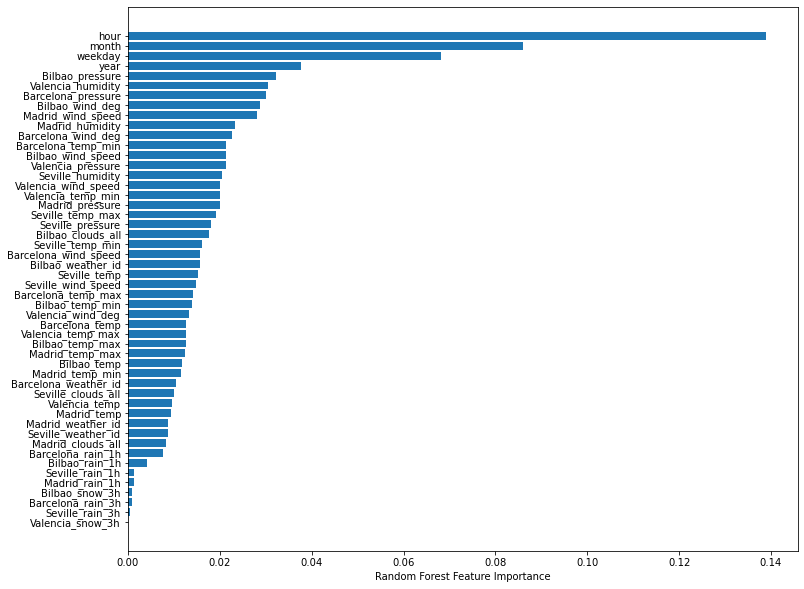

In [143]:
# visualise the feature importances
sorted_ind = feature_importances.argsort()

fig = plt.figure(figsize=(12, 10))
plt.barh(X_scaled.columns[sorted_ind], feature_importances[sorted_ind])
plt.xlabel('Random Forest Feature Importance')
plt.savefig('assets/imgs/random-forest-feature_importances_.png')
plt.show()

In [153]:
# get percentage of importance per feature
feature_importance_pct = feature_importances[sorted_ind] * 100
feat_imp_pct_df = pd.DataFrame(feature_importance_pct, columns=['Percentage'], index=X_scaled.columns[sorted_ind])
feat_imp_pct_df.sort_values(by='Percentage', ascending=False)

,Percentage
hour,13.883262
month,8.601787
weekday,6.816957
year,3.777675
Bilbao_pressure,3.224186
Valencia_humidity,3.038363
Barcelona_pressure,3.009648
Bilbao_wind_deg,2.865458
Madrid_wind_speed,2.800116
Madrid_humidity,2.321893


#### Top Features to Predict Load Shortfall

We have displayed the percentage that each feature contributes to predicting load shortfall. We see that `Valencia_snow_3h` contributes hardly anything to the prediction, whereas our four time-based features are the four strongest predictors of load shortfall.

#### Feature Importance using `permutation_importance`

### Insights from Feature Importance Results

These features can be used to perform additional feature selection in order to obtain a more sparse model. This improves the computational complexity of the model and also assits in ensuring a reduced generalisation error as a result of noise that is introduced by less important features.